<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import cv2 as cv 
import numpy as np
from matplotlib import pyplot as plt

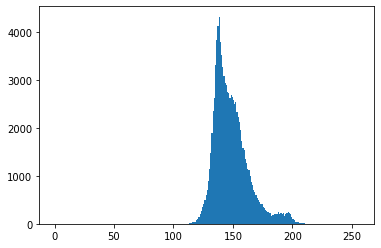

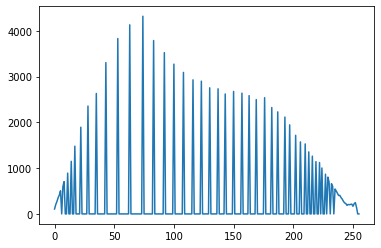

True

In [46]:
img = cv.imread('montain.jpg',0)
hist = cv.calcHist([img],[0],None,[256],[0,256])
plt.hist(img.ravel(),256,[0,256])
plt.show()

cdf = hist.cumsum() #计算累积直方图
cdf_m = np.ma.masked_equal(cdf,0) #除去直方图中的0值
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8') #将掩模处理掉的元素补为0

#计算均衡化之后的直方图
new_hist = np.zeros(256)
for i in range(256):
    num = cdf[i]
    f = hist[i]
    new_hist[int(num)] = f

plt.plot(new_hist)
plt.show()

#显示新的图片
new_img= cdf[image]
cv2.imshow("new_img", new_img)
cv2.waitKey(10000)
cv2.destroyAllWindows()

#保存图像
cv.imwrite('new_montain.jpg',new_img)


In [35]:
#coding=utf-8
import cv2
import numpy as np
 
image = cv2.imread("montain.jpg", 0)
 
lut = np.zeros(256, dtype = image.dtype )#创建空的查找表
 
hist,bins = np.histogram(image.flatten(),256,[0,256]) 
cdf = hist.cumsum() #计算累积直方图
cdf_m = np.ma.masked_equal(cdf,0) #除去直方图中的0值
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())#等同于前面介绍的lut[i] = int(255.0 *p[i])公式
cdf = np.ma.filled(cdf_m,0).astype('uint8') #将掩模处理掉的元素补为0
print(cdf)
print(cdf.shape)
#计算
result2 = new_gray[image]

result = cv2.LUT(image, cdf)
print(result2.shape)
cv2.imshow("OpenCVLUT", result)
cv2.imshow("NumPyLUT", result2)
cv2.waitKey(10000)
cv2.destroyAllWindows()

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   2   3   4
   5   7   8  11  14  17  22  28  35  43  53  63  74  83  92 100 108 116
 123 130 137 143 150 157 163 169 176 182 187 193 197 202 206 210 213 216
 219 222 224 227 229 230 232 233 235 236 237 238 239 240 241 242 242 243
 244 244 245 245 246 246 247 247 248 248 249 249 250 250 251 251 252 253
 253 253 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254
 254 254 254 254 254 254 254 254 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25